# Reducción de dimensión: Análisis de Componentes Principales

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

En este momento del curso son claras las razones por las cuales puede ser necesario implementar un etapa de reducción de dimensión en un problema de aprendizaje, y las dos alternativas disponibles: Selección/Extracción de Características.

Aunque la selección de características tiene ventajas en comparación con los métodos de extracción, también tiene desventejas, principalmente su alto costo computacional (que se ve agravado si el criterio de selcción es tipo wrapper) y la imposibilidad de garantizar la escogencia del mejor subconjunto de variables y por consiguiente la posible pérdida de información por las variables eliminadas.

El <b>Análisis de Componentes Principales</b> (En inglés Principal Component Analysis - PCA), es una técnica de extracción cuyo objetivo es reducir  la dimensión de un conjunto de variables, conservando la mayor cantidad de información que sea posible.
 

En conjuntos de variables con alta dependencia es frecuente que un pequeño número de nuevas variables (menos del 20 % de las originales) expliquen la mayor parte (más del 80 % de la variabilidad original [1]), Por lo tanto PCA realiza la transformación a un nuevo conjunto de variables que son no correlacionadas y se ordenan de modo tal que unas pocas retengan la mayor
cantidad de variación presente en el conjunto original de variables.


La medida de información en PCA está asociada entonces al <mark>nivel de variación</mark> de las variables.

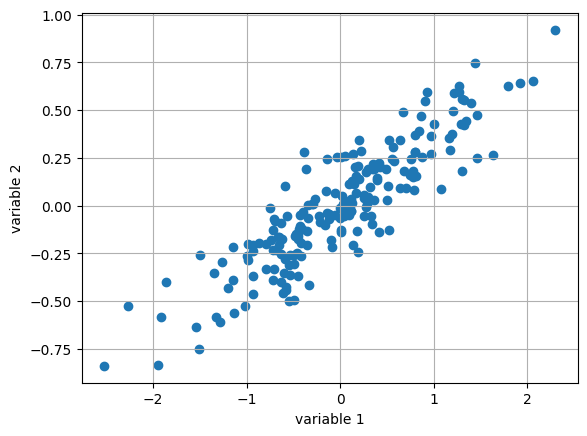

In [2]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T+10

# center data on 0,0
X=X-np.mean(X, axis=0)

plt.scatter(X[:,0], X[:,1])
plt.xlabel('variable 1')
plt.ylabel('variable 2')
plt.grid()
plt.savefig('Scatterplot.png',dpi=300)
plt.show()

**Veamos algunas proyecciones posibles**

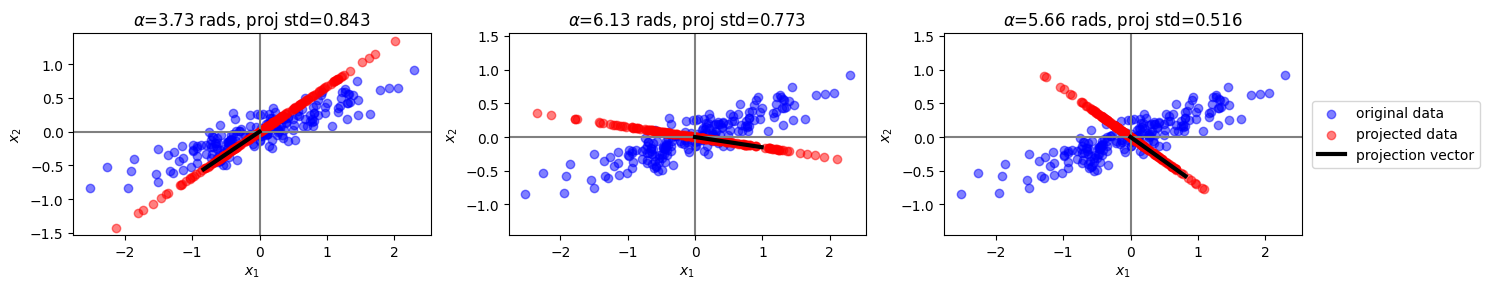

In [4]:
plt.figure(figsize=(15,3))

unit_vector = lambda angle: np.array([np.cos(angle), np.sin(angle)])

for i in range(3):
    plt.subplot(1,3,i+1)
    angle = np.random.random()*np.pi*2
    v = unit_vector(angle)

    c = X.dot(v.reshape(-1,1))/(np.linalg.norm(v)**2)
    Xp = np.repeat(v.reshape(-1,2),len(X),axis=0)*c

    plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="original data")
    plt.scatter(Xp[:,0], Xp[:,1], color="red", alpha=.5, label="projected data")
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.axvline(0, color="gray")
    plt.axhline(0, color="gray")
    plt.plot([0,v[0]], [0,v[1]], color="black", lw=3, label="projection vector")
    plt.axis('equal')
    #plt.ylim(-2,2)
    plt.title("$\\alpha$=%.2f rads, proj std=%.3f"%(angle, np.std(c)))
    if i==2:
        plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))
plt.tight_layout()
plt.savefig('projections.png',dpi=300)

**Formalmente...**

Supongamos que contamos con un matriz $\bf{X}$ que contiene $N$ muestras cada una de $d$ variables. Para el cálculo de las proyecciones de PCA es necesario que los elementos de la matriz $\bf{X}$ tengan media cero, así que suponemos que previamente hemos extraído la media a cada una de las variables. Por lo tanto la matriz de covarianza de los datos está dada por:

 $$\frac{1}{N}{\bf{X}}^T{\bf{X}}$$

Supongamos entonces que inicialmente el objetivo es proyectar todas las muestras observadas sobre un subespacio de dimensión 1 (una recta), de tal forma que todos los puntos mantengan, en la medida de lo posible, sus posiciones relativas, es decir nos interesa conservar la misma estructura de los datos originales pero en una dimensión menor.

Una condición a cumplir es que la distancia entre cada punto y su proyección sea mínima. Si representamos la dirección del plano sobre el cual se van a proyectar los datos por un vector unitario ${\bf{u}}_1 = (u_{11} , ..., u_{1d} )^T$ , la proyección de un punto
cualquiera ${\bf{x}}_i$ sobre esta dirección es el escalar:


$$z_i={\bf{u}}_1^T {\bf{x}}_i$$

Graficamente: 

<img src="./Local/imgs/PCA1.png" alt="SFS" width="400"/>

Para intentar conservar la estructura original se puede plantear que la distancia entre el punto original y su proyección sea la más corta posible, por lo tanto si $r_i$ es la distancia entre el punto ${\bf{x}}_i$ y su proyección sobre la dirección ${\bf{u}}_1$, el objetivo es:

$$\mathop {\min }\limits_{{\bf{u}}_1} \sum_{i=1}^{N} r_{i}^{2} = \mathop {\min }\limits_{{\bf{u}}_1} \sum_{i=1}^{N} |{\bf{x}}_i - z_i {\bf{u}}_1|^{2}$$

Lo que implica encontrar el vector ${\bf{u}}_1$ que maximice $z_i^{2}$, osea:

$$\mathop {\max }\limits_{{\bf{u}}_1} \sum_{i=1}^{N} z_{i}^{2} = \mathop {\max }\limits_{{\bf{u}}_1} \sum_{i=1}^{N} {\bf{u}}_1^{T} {\bf{x}}_i^{T} {\bf{x}}_i {\bf{u}}_1 $$

Teniendo en cuenta la proyección de toda la matriz ${\bf{X}}$,

$${\bf{z}}_1 = {\bf{X}} {\bf{u}}_1$$

El problema de maximización anterior se puede reescribir como:

$$\frac{1}{N} {\bf{z}}_1^{T}{\bf{z}}_1 = \frac{1}{N} {\bf{u}}_1^{T} {\bf{X}}^{T} {\bf{X}} {\bf{u}}_1 = {\bf{u}}_1^{T} {\bf{S}} {\bf{u}}_1 $$

donde ${\bf{S}}$ es la matriz de covarianza.

Para que el valor de ${\bf{u}}_1$ no crezca indiscriminadamente durante la maximización, es necesario limitar su valor (Lo importante del vector ${\bf{u}}_1$ es su dirección). La restricción se introduce a través de multiplicadores de Lagrange:

$$M = {\bf{u}}_1^{T} {\bf{S}} {\bf{u}}_1 - \lambda ({\bf{u}}_1^{T}{\bf{u}}_1 - 1)$$

Derivando e igualando a cero:

$$\frac{\partial M}{\partial {\bf{u}}_1} = 2 {\bf{S}} {\bf{u}}_1  - 2\lambda {\bf{u}}_1 = 0$$

Da como resultado

$${\bf{S}} {\bf{u}}_1  = \lambda {\bf{u}}_1$$

Esto significa que ${\bf{u}}_1$ es un vector propio de la matriz ${\bf{S}}$ y está asociado al valor propio $\lambda$.

Si premultiplicamos a ambos lados de la ecuación anterior por ${\bf{u}}_1^T$ nos da como resultado la covarianza de ${\bf{z}}_1$ y como el objetivo es que la varianza sea muy grande, entonces eso implica que el vector propio que debemos seleccionar es aquel que esté asociado al mayor valor propio. En resumen, el vector propio asociado al mayor valor propio ${\bf{S}}$ corresponde al <b>primer componente principal</b>.

En general, es posible hallar el espacio de dimensión $p<d$ que mejor represente los datos, el cual está dado por los vectores propios asociados a los $p$ mayores valores propios de ${\bf{S}}$. Estas nuevas direcciones se denominan direcciones principales de los datos y las proyecciones de los datos originales sobre estas direcciones se conocen como <b>componentes principales</b>.

<img src="./Local/imgs/PCA2.png" alt="SFS" width="600"/>

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

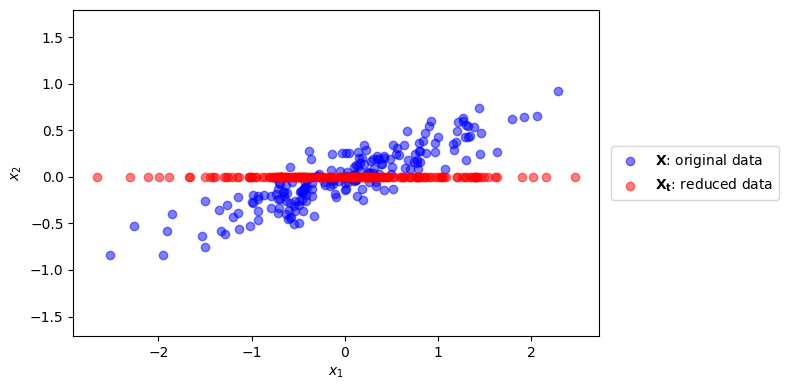

In [7]:
pca.fit(X)
Xt = pca.transform(X)[:,0]
plt.figure(figsize=(8,4))
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="$\mathbf{X}$: original data")
plt.scatter(Xt, [0]*len(Xt), color="red", alpha=.5, label="$\mathbf{X_t}$: reduced data")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis("equal");
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))
plt.tight_layout()
plt.savefig('Projected_PCA.png',dpi=300)
plt.show()

Podemos reconstruir las proyecciones en 2D

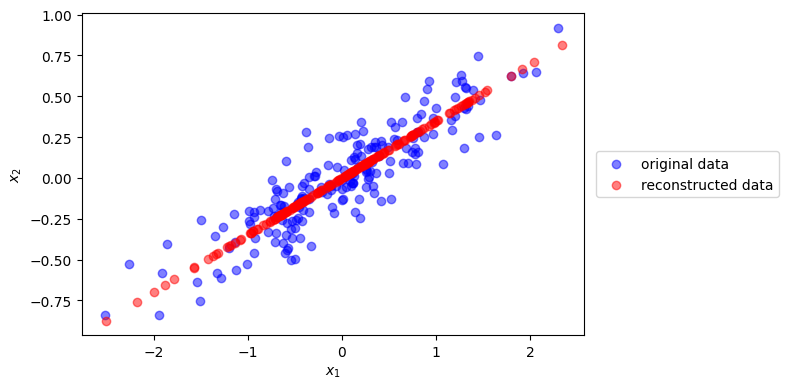

In [8]:
u0 = pca.components_[0]
c = X.dot(u0)
Xr = np.r_[[i*u0 for i in c]]
plt.figure(figsize=(8,4))
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="original data")
plt.scatter(Xr[:,0], Xr[:,1], color="red", alpha=.5, label="reconstructed data")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))
plt.tight_layout()
plt.savefig('Rec_PCA.png',dpi=300)
plt.show()

In [9]:
u0

array([0.94446029, 0.32862557])

Otros ejemplos...

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()

In [12]:
Cov = np.array([[2.9, -2.2], [-2.2, 6.5]])
X = np.random.multivariate_normal([1,2], Cov, size=200)
np.random.seed(1)
X_HD = np.dot(X,np.random.uniform(0.2,3,(2,4))*(np.random.randint(0,2,(2,4))*2-1))
print(X_HD.shape)

(200, 4)


In [14]:
pca = PCA(1) # only keep one dimension!
X_E = pca.fit_transform(X_HD)
print(X_E[:10,:])

[[ 0.35561816]
 [-2.82197099]
 [ 4.26330093]
 [ 8.48870185]
 [-1.05673782]
 [-6.65893693]
 [ 4.76293014]
 [-8.97422872]
 [ 6.62863046]
 [-3.13738523]]


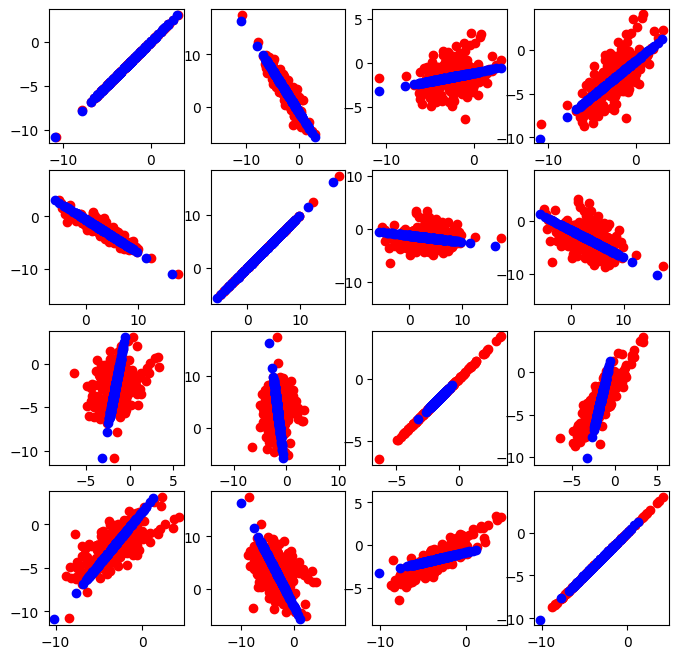

In [17]:
X_reconstructed = pca.inverse_transform(X_E)
plt.figure(figsize=(8,8))
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.scatter(X_HD[:,i], X_HD[:,j],c='r')
        plt.scatter(X_reconstructed[:,i], X_reconstructed[:,j],c='b')
        plt.axis('equal')

## Ejemplo en reconocimiento de rosotros (EigenFaces)

In [18]:
import pylab as pl

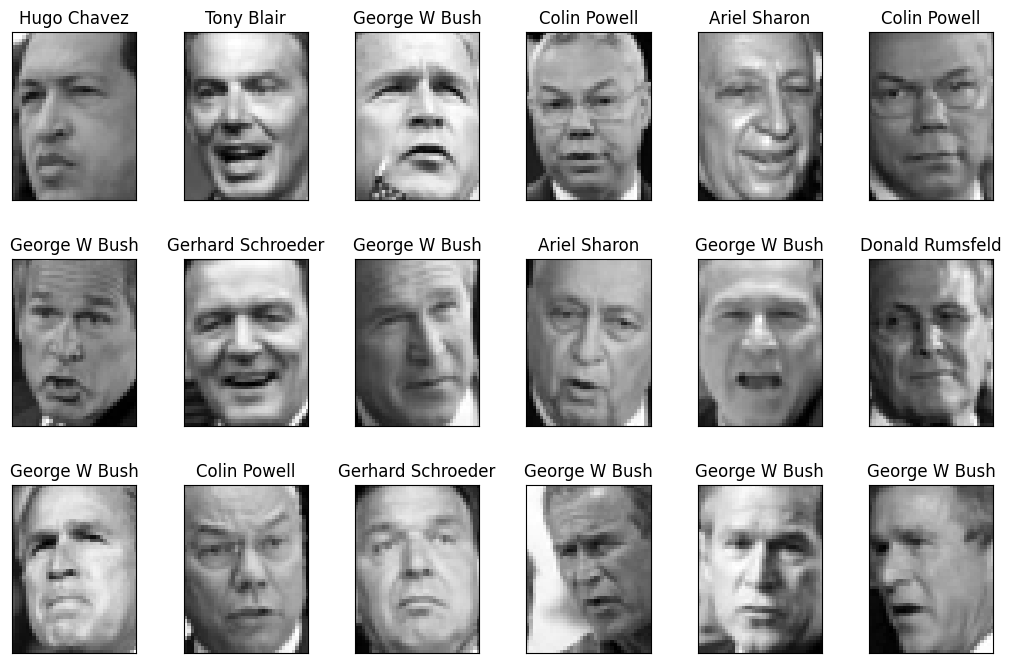

In [20]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

n_samples, n_features = X.shape
_, h, w = lfw_people.images.shape
n_classes = len(names)
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())

plot_gallery(X, names[y], h, w)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(966, 1850)


In [67]:
from sklearn.decomposition import PCA

n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (
    n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True)

%time pca.fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 150 eigenfaces from 966 faces
CPU times: user 46 ms, sys: 9.54 ms, total: 55.6 ms
Wall time: 50.9 ms


/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T

En este caso los componenetes principales se pueden visualizar en forma de imágenes y podemos observar que conservan información de las formas de los rostros y los planos con mayor variación dentro de éstos.

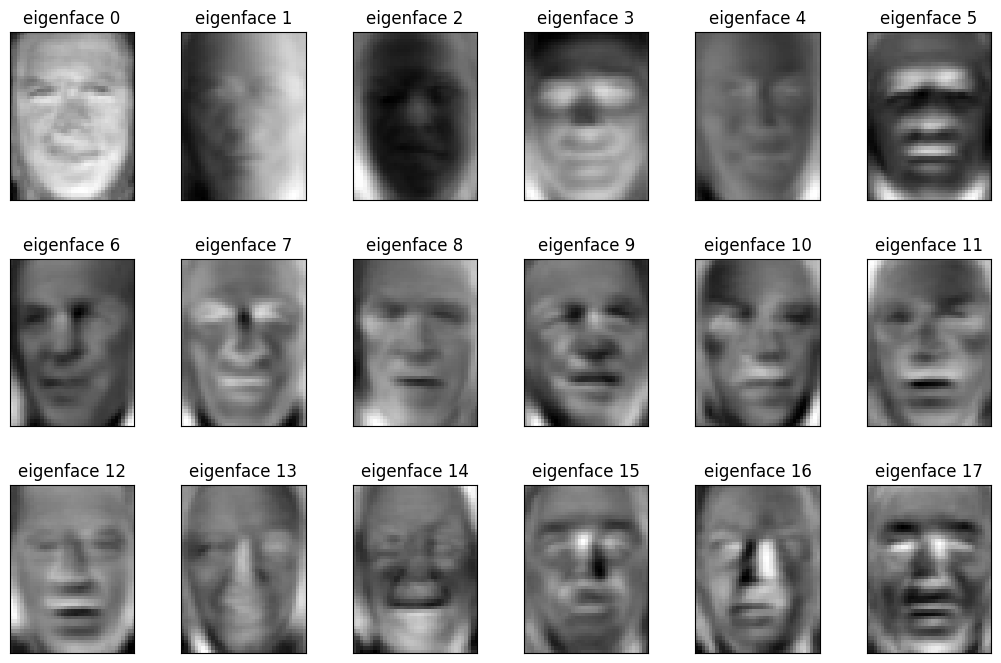

In [68]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

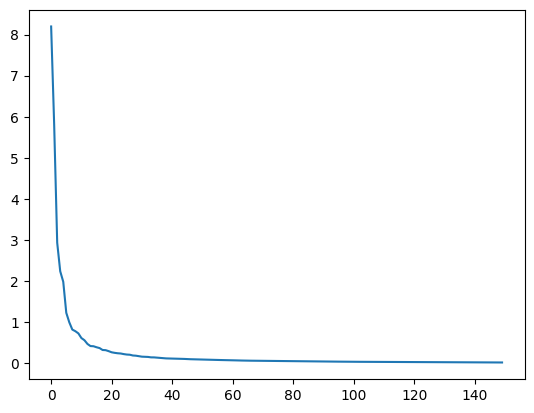

In [69]:
plt.plot(pca.explained_variance_);

In [70]:
X_train_pca = pca.transform(X_train)

/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-packages/sklearn/decomposition/_base.py:155: RuntimeWarning: divide by zero encountered in matmul
  X_transformed -= xp.reshape(self.mean_, (1, -1)) @ self.components_.T
/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-

In [71]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', class_weight='balanced')
svm

SVC(class_weight='balanced')

In [72]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.20)

%time svm_cv_scores = cross_val_score(svm, X_train_pca, y_train, scoring='accuracy', n_jobs=2)
svm_cv_scores

CPU times: user 6.97 ms, sys: 4.84 ms, total: 11.8 ms
Wall time: 169 ms


array([0.85051546, 0.75647668, 0.78238342, 0.79274611, 0.74611399])

Realizamos la selección de los mejores parámetros del modelo, en este caso una SVM.

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [1e3, 5e3, 1e4, 5e4, 1e5],
    'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}
clf = GridSearchCV(svm, param_grid, scoring='accuracy', cv=cv, n_jobs=2)

In [74]:
%time clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by randomized hyper parameter search:")
print(clf.best_params_)
print("Best parameters validation score: {:.3f}".format(clf.best_score_))

CPU times: user 71 ms, sys: 8.53 ms, total: 79.5 ms
Wall time: 1.85 s
Best estimator found by randomized hyper parameter search:
{'C': 1000.0, 'gamma': 0.005}
Best parameters validation score: 0.842


/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-packages/sklearn/decomposition/_base.py:155: RuntimeWarning: divide by zero encountered in matmul
  X_transformed -= xp.reshape(self.mean_, (1, -1)) @ self.components_.T
/Users/jdariasl/Documents/MaterialesClase/Intro_ML_course/.venv/lib/python3.11/site-

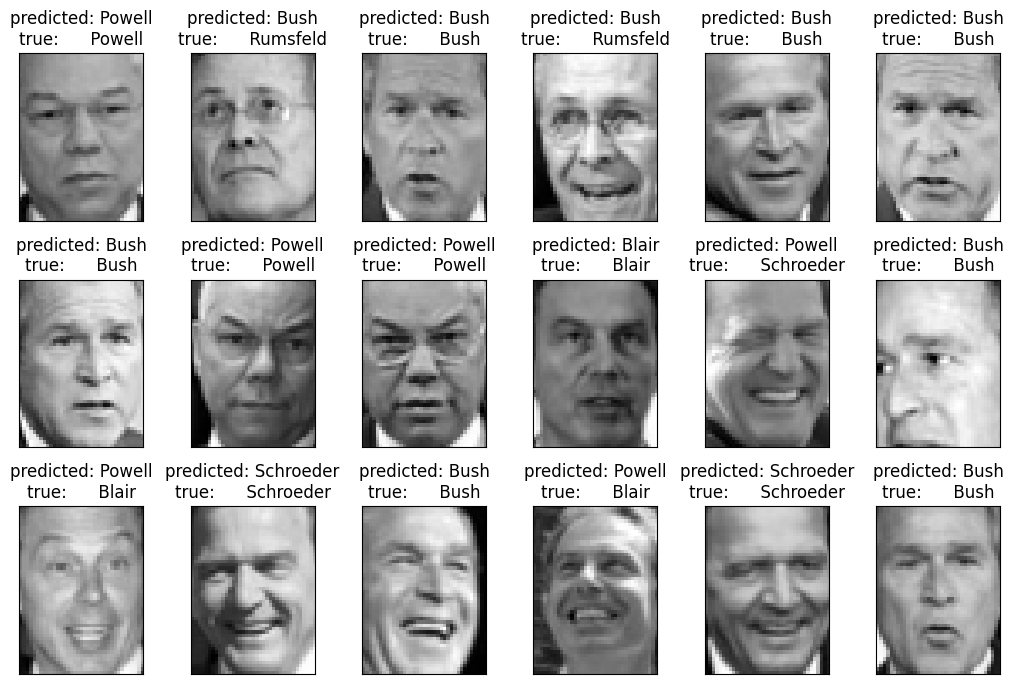

In [75]:
X_test_pca = pca.transform(X_test)
y_pred = clf.predict(X_test_pca)
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

## Selección del número de componentes

<li> Realizar un gráfico de $\lambda_i$ contra $i$ </li>

<li>  Seleccionar los primeros componentes hasta cubrir una proporción determinada de varianza, como por ejemplo el 80%, 90% o 95%</li>

<li>  Desechar aquellos componentes asociados a valores propios inferiores a una cota, la cual es usualmente la varianza media</li>

<li>  Tomar como valor óptimo el número de componentes correspondiente al codo la curva $\lambda_i$ contra $i$</li>

<li>  Evaluar a partir de un criterio wrapper el mejor número de componentes (costoso computacionalmente pero de mejore resultados)</li>

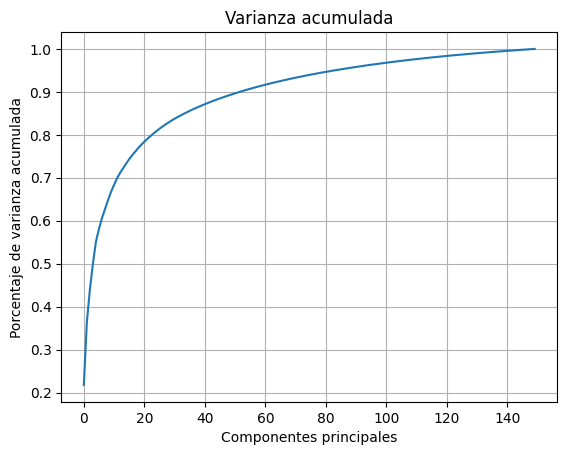

In [31]:
plt.plot(np.cumsum(pca.explained_variance_/np.sum(pca.explained_variance_)))
plt.title('Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza acumulada')
plt.grid()